In [79]:
#regresion losgistica Binomial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## librerias de machin learnong
 

## librerias de parametrizacion



data = '../Modulo_3/dataset/weatherAUS.csv'
df = pd.read_csv(data)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [80]:
##Extraer los encabezados del dataframe
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [81]:
##Categóricas y numéricas
categoricas = [i for i in df.columns if df[i].dtype=='O']

print('Hay {} variables de tipo categórico'.format(len(categoricas)))

print('Las variables categóricas son:', categoricas)

Hay 7 variables de tipo categórico
Las variables categóricas son: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [82]:
df[categoricas].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [83]:
##Datos NAN de las columnas categóricas
df[categoricas].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [84]:
##Sacar los conteos de datos NAN sin los valores de cero
cat1 = [i for i in categoricas if df[i].isnull().sum()!= 0]
print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


In [85]:
##Revisar las etiquetas u opciones de las variables
for i in categoricas:
    print(i, 'contiene', len(df[i].unique()),'Etiquetas')

Date contiene 3436 Etiquetas
Location contiene 49 Etiquetas
WindGustDir contiene 17 Etiquetas
WindDir9am contiene 17 Etiquetas
WindDir3pm contiene 17 Etiquetas
RainToday contiene 3 Etiquetas
RainTomorrow contiene 3 Etiquetas


In [86]:
#limpieza 

df['Date']= pd.to_datetime(df['Date'])

In [87]:
#### variables dummues y exploracion de la columna location

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [88]:
## variables dummies de location
#df2 = df

pd.get_dummies(df.Location, drop_first=True)

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [89]:
#dummie para viento 

pd.get_dummies(df['WindGustDir'], drop_first= True, dummy_na=True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
145457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
#viento 9 am
pd.get_dummies(df['WindDir9am'], drop_first= True, dummy_na=True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [91]:
#viento 3 pm
pd.get_dummies(df['WindDir3pm'], drop_first= True, dummy_na=True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
145458,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [93]:
pd.get_dummies(df['RainToday'], drop_first= True, dummy_na=True)

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [94]:
# filtro para variables numericas 

##Categóricas y numéricas
numericas = [i for i in df.columns if df[i].dtype!='O']

print('Hay {} variables de tipo numericas'.format(len(numericas)))

print('Las variables numericas son:', numericas)

Hay 17 variables de tipo numericas
Las variables numericas son: ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [95]:
df[numericas].isnull().sum()

Date                 0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

Text(0, 0.5, 'vel viento')

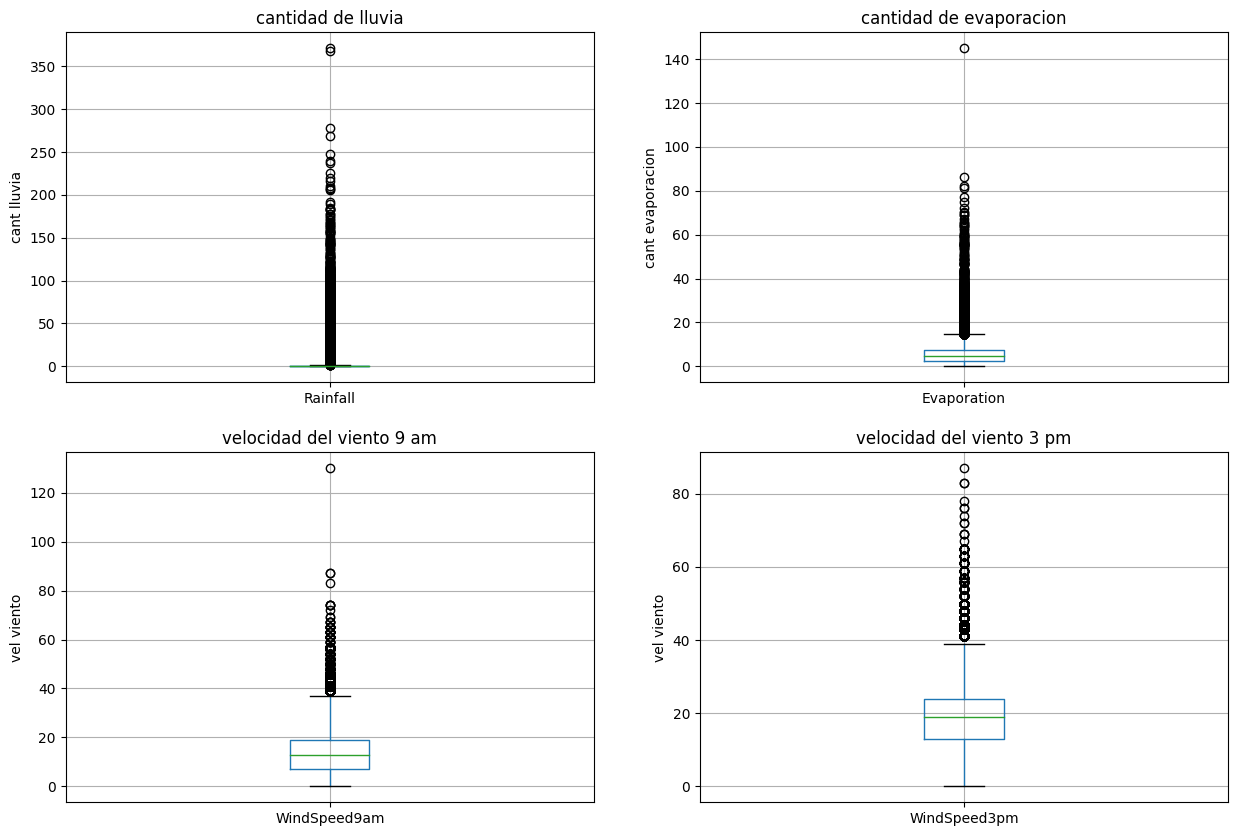

In [96]:
## grafica para ver el ruido de los datos

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('cantidad de lluvia')
fig.set_ylabel('cant lluvia')

plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('cantidad de evaporacion')
fig.set_ylabel('cant evaporacion')

plt.subplot(2,2,3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('velocidad del viento 9 am')
fig.set_ylabel('vel viento')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('velocidad del viento 3 pm')
fig.set_ylabel('vel viento')

Text(0, 0.5, 'vel viento')

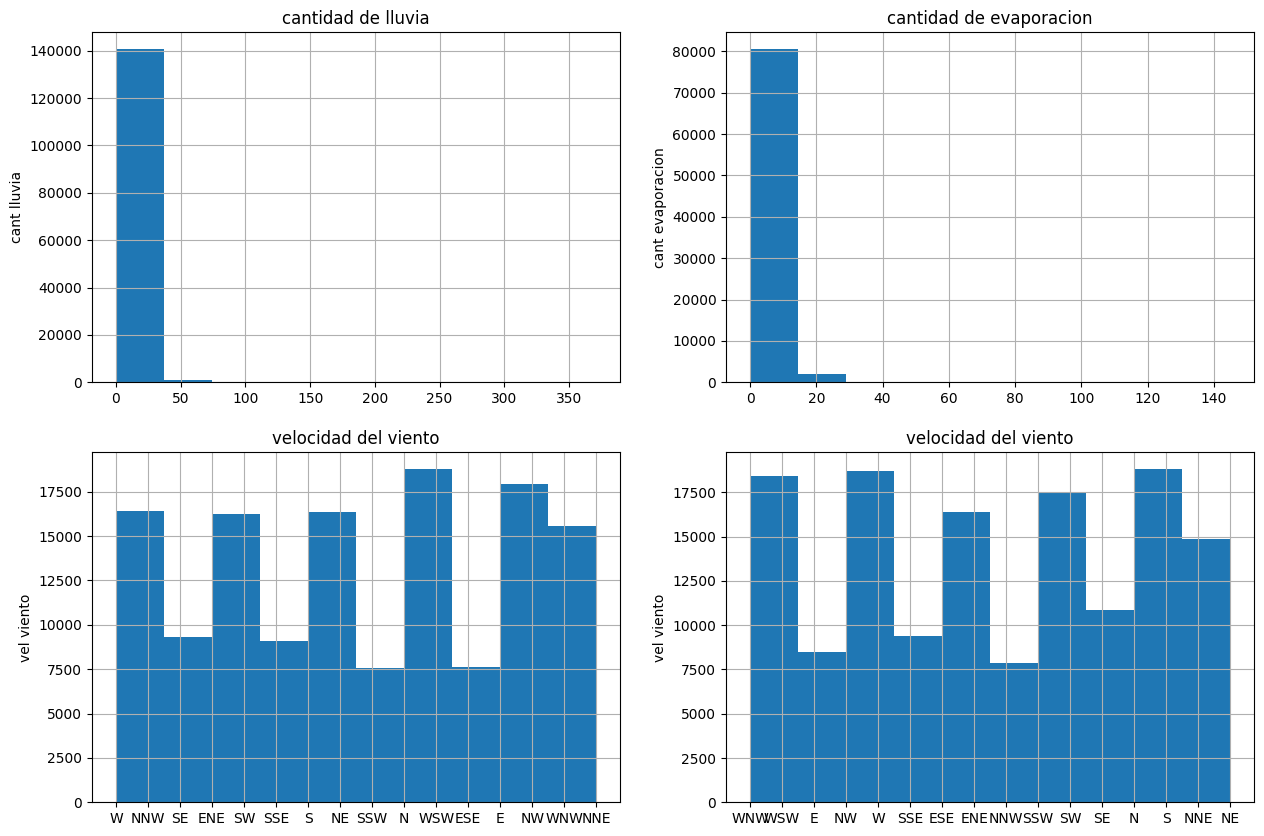

In [97]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.Rainfall.hist(bins=10)
fig.set_title('cantidad de lluvia')
fig.set_ylabel('cant lluvia')


plt.subplot(2,2,2)
fig = df.Evaporation.hist(bins=10)
fig.set_title('cantidad de evaporacion')
fig.set_ylabel('cant evaporacion')

plt.subplot(2,2,3)
fig = df.WindDir9am.hist(bins=10)
fig.set_title('velocidad del viento')
fig.set_ylabel('vel viento')


plt.subplot(2,2,4)
fig = df.WindDir3pm.hist(bins=10)
fig.set_title('velocidad del viento')
fig.set_ylabel('vel viento')



In [98]:
##Rango del ruido de esas variables numericas - rango intercuantilico

iqr = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)

puntoMin= df.Rainfall.quantile(0.25) - (iqr*3)
puntoMax= df.Rainfall.quantile(0.75) + (iqr*3)

print('para la colimba rainfall el reuido esta entre los valores {} y {}'.format(puntoMin, puntoMax))

## el ruido empieza desde 3.2

para la colimba rainfall el reuido esta entre los valores -2.4000000000000004 y 3.2


In [99]:
iqr = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)

puntoMin= df.Evaporation.quantile(0.25) - (iqr*3)
puntoMax= df.Evaporation.quantile(0.75) + (iqr*3)

print('para la colimba rainfall el reuido esta entre los valores {} y {}'.format(puntoMin, puntoMax))


para la colimba rainfall el reuido esta entre los valores -11.800000000000002 y 21.800000000000004


In [100]:
iqr = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)

puntoMin= df.WindSpeed3pm.quantile(0.25) - (iqr*3)
puntoMax= df.WindSpeed3pm.quantile(0.75) + (iqr*3)
print('para la colimba rainfall el reuido esta entre los valores {} y {}'.format(puntoMin, puntoMax))

para la colimba rainfall el reuido esta entre los valores -20.0 y 57.0


In [101]:
iqr = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)

puntoMin= df.WindSpeed9am.quantile(0.25) - (iqr*3)
puntoMax= df.WindSpeed9am.quantile(0.75) + (iqr*3)
print('para la colimba rainfall el reuido esta entre los valores {} y {}'.format(puntoMin, puntoMax))

para la colimba rainfall el reuido esta entre los valores -29.0 y 55.0


In [102]:
#particiones de la data x y
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [103]:
#particiones xtrian xtest y ytrain y ytest

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [104]:

# filtro para variables numericas 

##Categóricas y numéricas

categoricos = [i for i in X_train.columns if X_train[i].dtype=='O']

print('Hay {} variables de tipo numericas'.format(len(categoricos)))

print('Las variables numericas son:', categoricos)

Hay 5 variables de tipo numericas
Las variables numericas son: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [105]:
numericas = [i for i in X_train.columns if X_train[i].dtype!='O']
print('Hay {} variables de tipo numericas'.format(len(numericas)))

print('Las variables numericas son:', numericas)

Hay 17 variables de tipo numericas
Las variables numericas son: ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [106]:
X_train.isnull().sum()

Date                 0
Location             0
MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustDir       8250
WindGustSpeed     8202
WindDir9am        8429
WindDir3pm        3397
WindSpeed9am      1408
WindSpeed3pm      2457
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
RainToday         2604
dtype: int64

In [107]:
X_test.isnull().sum()

Date                 0
Location             0
MinTemp            307
MaxTemp            263
Rainfall           657
Evaporation      12461
Sunshine         13893
WindGustDir       2076
WindGustSpeed     2061
WindDir9am        2137
WindDir3pm         831
WindSpeed9am       359
WindSpeed3pm       605
Humidity9am        537
Humidity3pm        891
Pressure9am       3004
Pressure3pm       2986
Cloud9am         11131
Cloud3pm         11810
Temp9am            362
Temp3pm            712
RainToday          657
dtype: int64

In [108]:
## for para limpieza de datos numericos

for i in [X_train,X_test]:
    for col in numericas:
        col_median = X_train[col].median()
        i[col].fillna(col_median, inplace = True)

In [109]:
X_train.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      8250
WindGustSpeed       0
WindDir9am       8429
WindDir3pm       3397
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        2604
dtype: int64

In [110]:
X_test.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      2076
WindGustSpeed       0
WindDir9am       2137
WindDir3pm        831
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         657
dtype: int64

In [111]:
## for para limpieza de datos categoricos

#for i in [X_train,X_test]:
#    for col in numericas:
#        col_median = X_train[col].mode()
#        i[col].fillna(col_median[0], inplace = True)

In [112]:
##For gomelo Dos para categóricos
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [113]:
X_test.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [114]:
### Rain today - Category encoders - pip install category_encoders
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.fit_transform(X_test)

X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
111548,2017-04-24,Albany,14.5,17.8,14.2,4.8,8.4,W,39.0,N,...,94.0,52.0,1024.1,1022.5,8.0,5.0,16.2,21.1,0,1
142528,2013-10-11,Katherine,24.6,39.5,0.0,12.0,8.4,SE,31.0,N,...,52.0,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,1,0
65304,2012-02-18,MelbourneAirport,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,...,87.0,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,1,0
40651,2012-02-18,Williamtown,18.3,26.6,0.0,4.8,8.4,SE,28.0,WSW,...,79.0,67.0,1017.0,1016.5,6.0,5.0,23.0,25.4,1,0
97487,2011-10-11,Adelaide,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,...,63.0,47.0,1018.6,1017.1,5.0,5.0,14.4,18.3,1,0


In [115]:
X_train = pd.concat([X_train[numericas], X_train[['RainToday_0','RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [116]:
X_test = pd.concat([X_test[numericas], X_test[['RainToday_0','RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [117]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.195085,23.214229,2.325638,5.177513,7.991327,39.963031,14.039427,18.670597,68.927927,51.564992,...,0.053657,0.059518,0.068232,0.103757,0.065009,0.055608,0.064451,0.069443,0.061220,0.065473
std,6.367295,7.087178,8.448650,3.177739,2.755849,13.144589,8.865300,8.725620,18.842219,20.458995,...,0.225341,0.236593,0.252144,0.304946,0.246543,0.229164,0.245555,0.254208,0.239734,0.247360
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.200000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_train.mode()[0], inplace=True)

In [119]:
#modelo 1

from sklearn.linear_model import LogisticRegression

reglog1 = LogisticRegression(solver='liblinear', random_state=42)

reglog1.fit(X_train, y_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>)